In [1]:
import csv
import glob
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('tableau-colorblind10')

network_sizes = [100, 1000, 2500, 5000, 10000]
connection_nums = [3, 4, 5, 6]
cache_sizes = [30, 40, 50, 60]

In [2]:
data = []

for filename in glob.glob("./results/*.csv"):
    file_info = filename.split("_")
    network_size = int(file_info[1])
    num_connections = int(file_info[2])
    cache_size = int(file_info[3].replace(".csv", ""))
    with open(filename, "r") as f:
        reader = csv.reader(f, delimiter=',')
        reader.__next__()
        max_devices = -1
        max_devices_with_metric = -1
        max_hops = -1
        max_total_hops = -1
        file_data = []
        for line in reader:
            if int(line[5]) == -1:
                #pass
                continue
            line_data = {}
            line_data["Total Hops"] = int(line[1])
            line_data["Total Devices"] = int(line[2])
            line_data["Devices with Metric"] = int(line[3])
            line_data["Max Hops"] = int(line[4])
            line_data["Hop Limit"] = int(line[5])
            line_data["type"] = line[-1]
            line_data["network_size"] = network_size
            line_data["num_connections"] = num_connections
            line_data["cache_size"] = cache_size
            #line_data["Time"] = datetime.strptime(line[6], '%a %b %d %H:%M:%S %Z %Y').timestamp() - datetime.strptime(line[5], '%a %b %d %H:%M:%S %Z %Y').timestamp()
            file_data.append(line_data)
            if line_data["Total Devices"] > max_devices:
                max_devices = line_data["Total Devices"]
            if line_data["Devices with Metric"] > max_devices_with_metric:
                max_devices_with_metric = line_data["Devices with Metric"]
            if line_data["Total Hops"] > max_total_hops:
                max_total_hops = line_data["Total Hops"]
            if line_data["Max Hops"] > max_hops:
                max_hops = line_data["Max Hops"]
                
        for line_data in file_data:
            line_data["Normalized Total Devices"] = float(line_data["Total Devices"])/max_devices
            line_data["Normalized Devices with Metric"] = float(line_data["Devices with Metric"])/max_devices_with_metric
            line_data["Normalized Max Hops"] = float(line_data["Max Hops"])/max_hops
            line_data["Normalized Total Hops"] = float(line_data["Total Hops"])/max_total_hops
        
        data.extend(file_data)
        
print(data[0:5])

[{'Total Hops': 202, 'Total Devices': 1555, 'Devices with Metric': 128, 'Max Hops': 13, 'Hop Limit': 13, 'type': 'gossip_type_0', 'network_size': 100, 'num_connections': 4, 'cache_size': 30, 'Normalized Total Devices': 0.6095648765190121, 'Normalized Devices with Metric': 0.45878136200716846, 'Normalized Max Hops': 0.9285714285714286, 'Normalized Total Hops': 0.8706896551724138}, {'Total Hops': 11, 'Total Devices': 298, 'Devices with Metric': 37, 'Max Hops': 3, 'Hop Limit': 5, 'type': 'gossip_type_1', 'network_size': 100, 'num_connections': 4, 'cache_size': 30, 'Normalized Total Devices': 0.11681693453547629, 'Normalized Devices with Metric': 0.13261648745519714, 'Normalized Max Hops': 0.21428571428571427, 'Normalized Total Hops': 0.04741379310344827}, {'Total Hops': 1, 'Total Devices': 245, 'Devices with Metric': 28, 'Max Hops': 1, 'Hop Limit': 9, 'type': 'gossip_type_1', 'network_size': 100, 'num_connections': 4, 'cache_size': 30, 'Normalized Total Devices': 0.09604076832614661, 'Nor

## Average Number of Devices with Metric Discovered

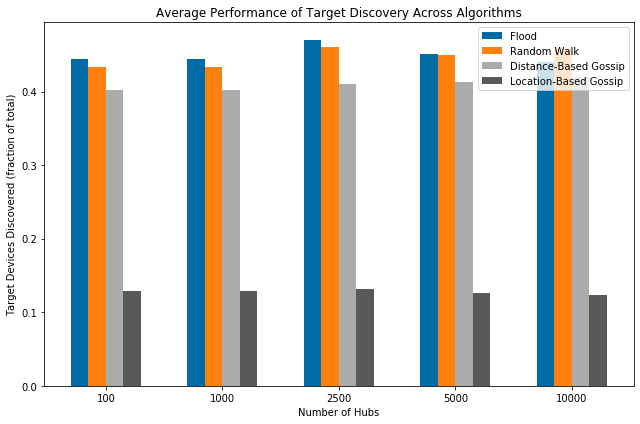

In [8]:
plt.figure(figsize=(9,6))
index = np.arange(len(network_sizes))
bar_width = 0.15

flood = [np.mean(sorted([x['Normalized Devices with Metric'] for x in data if x["type"] == "flood" and x["network_size"] == network_sizes[1]])[:-1]),
        np.mean(sorted([x['Normalized Devices with Metric'] for x in data if x["type"] == "flood" and x["network_size"] == network_sizes[1]])[:-1]),
        np.mean(sorted([x['Normalized Devices with Metric'] for x in data if x["type"] == "flood" and x["network_size"] == network_sizes[2]])[:-1]),
        np.mean(sorted([x['Normalized Devices with Metric'] for x in data if x["type"] == "flood" and x["network_size"] == network_sizes[3]])[:-1]),
        np.mean(sorted([x['Normalized Devices with Metric'] for x in data if x["type"] == "flood" and x["network_size"] == network_sizes[4]])[:-1])]

random_walk = [np.mean([x['Normalized Devices with Metric'] for x in data if x["type"] == "randomWalk" and x["network_size"] == network_sizes[1]]),
        np.mean([x['Normalized Devices with Metric'] for x in data if x["type"] == "randomWalk" and x["network_size"] == network_sizes[1]]),
        np.mean([x['Normalized Devices with Metric'] for x in data if x["type"] == "randomWalk" and x["network_size"] == network_sizes[2]]),
        np.mean([x['Normalized Devices with Metric'] for x in data if x["type"] == "randomWalk" and x["network_size"] == network_sizes[3]]),
        np.mean([x['Normalized Devices with Metric'] for x in data if x["type"] == "randomWalk" and x["network_size"] == network_sizes[4]])]

distance_gossip = [np.mean([x['Normalized Devices with Metric'] for x in data if x["type"] == "gossip_type_0" and x["network_size"] == network_sizes[1]]),
        np.mean([x['Normalized Devices with Metric'] for x in data if x["type"] == "gossip_type_0" and x["network_size"] == network_sizes[1]]),
        np.mean([x['Normalized Devices with Metric'] for x in data if x["type"] == "gossip_type_0" and x["network_size"] == network_sizes[2]]),
        np.mean([x['Normalized Devices with Metric'] for x in data if x["type"] == "gossip_type_0" and x["network_size"] == network_sizes[3]]),
        np.mean([x['Normalized Devices with Metric'] for x in data if x["type"] == "gossip_type_0" and x["network_size"] == network_sizes[4]])]

location_gossip = [np.mean([x['Normalized Devices with Metric'] for x in data if x["type"] == "gossip_type_1" and x["network_size"] == network_sizes[1]]),
        np.mean([x['Normalized Devices with Metric'] for x in data if x["type"] == "gossip_type_1" and x["network_size"] == network_sizes[1]]),
        np.mean([x['Normalized Devices with Metric'] for x in data if x["type"] == "gossip_type_1" and x["network_size"] == network_sizes[2]]),
        np.mean([x['Normalized Devices with Metric'] for x in data if x["type"] == "gossip_type_1" and x["network_size"] == network_sizes[3]]),
        np.mean([x['Normalized Devices with Metric'] for x in data if x["type"] == "gossip_type_1" and x["network_size"] == network_sizes[4]])]

plt.bar(index, flood, bar_width, label='Flood')
plt.bar(index + bar_width, random_walk, bar_width, label='Random Walk')
plt.bar(index + bar_width*2, distance_gossip, bar_width, label='Distance-Based Gossip')
plt.bar(index + bar_width*3, location_gossip, bar_width, label='Location-Based Gossip')

plt.xlabel('Number of Hubs')
plt.ylabel('Target Devices Discovered (fraction of total)')
plt.title('Average Performance of Target Discovery Across Algorithms')
plt.xticks(index + 1.5*bar_width, network_sizes)
plt.legend()

plt.tight_layout()
plt.show()

## Maxmimum Number of Devices with Metric Discovered

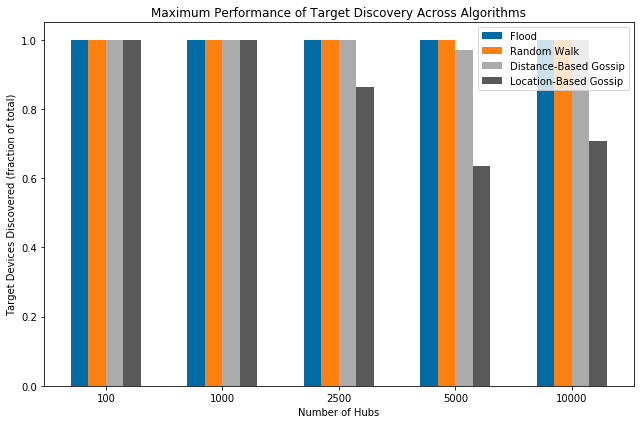

In [4]:
plt.figure(figsize=(9,6))
index = np.arange(len(network_sizes))
bar_width = 0.15

flood = [np.max(sorted([x['Normalized Devices with Metric'] for x in data if x["type"] == "flood" and x["network_size"] == network_sizes[1]])),
        np.max(sorted([x['Normalized Devices with Metric'] for x in data if x["type"] == "flood" and x["network_size"] == network_sizes[1]])),
        np.max(sorted([x['Normalized Devices with Metric'] for x in data if x["type"] == "flood" and x["network_size"] == network_sizes[2]])),
        np.max(sorted([x['Normalized Devices with Metric'] for x in data if x["type"] == "flood" and x["network_size"] == network_sizes[3]])),
        np.max(sorted([x['Normalized Devices with Metric'] for x in data if x["type"] == "flood" and x["network_size"] == network_sizes[4]]))]

random_walk = [np.max([x['Normalized Devices with Metric'] for x in data if x["type"] == "randomWalk" and x["network_size"] == network_sizes[1]]),
        np.max([x['Normalized Devices with Metric'] for x in data if x["type"] == "randomWalk" and x["network_size"] == network_sizes[1]]),
        np.max([x['Normalized Devices with Metric'] for x in data if x["type"] == "randomWalk" and x["network_size"] == network_sizes[2]]),
        np.max([x['Normalized Devices with Metric'] for x in data if x["type"] == "randomWalk" and x["network_size"] == network_sizes[3]]),
        np.max([x['Normalized Devices with Metric'] for x in data if x["type"] == "randomWalk" and x["network_size"] == network_sizes[4]])]

distance_gossip = [np.max([x['Normalized Devices with Metric'] for x in data if x["type"] == "gossip_type_0" and x["network_size"] == network_sizes[1]]),
        np.max([x['Normalized Devices with Metric'] for x in data if x["type"] == "gossip_type_0" and x["network_size"] == network_sizes[1]]),
        np.max([x['Normalized Devices with Metric'] for x in data if x["type"] == "gossip_type_0" and x["network_size"] == network_sizes[2]]),
        np.max([x['Normalized Devices with Metric'] for x in data if x["type"] == "gossip_type_0" and x["network_size"] == network_sizes[3]]),
        np.max([x['Normalized Devices with Metric'] for x in data if x["type"] == "gossip_type_0" and x["network_size"] == network_sizes[4]])]

location_gossip = [np.max([x['Normalized Devices with Metric'] for x in data if x["type"] == "gossip_type_1" and x["network_size"] == network_sizes[1]]),
        np.max([x['Normalized Devices with Metric'] for x in data if x["type"] == "gossip_type_1" and x["network_size"] == network_sizes[1]]),
        np.max([x['Normalized Devices with Metric'] for x in data if x["type"] == "gossip_type_1" and x["network_size"] == network_sizes[2]]),
        np.max([x['Normalized Devices with Metric'] for x in data if x["type"] == "gossip_type_1" and x["network_size"] == network_sizes[3]]),
        np.max([x['Normalized Devices with Metric'] for x in data if x["type"] == "gossip_type_1" and x["network_size"] == network_sizes[4]])]

plt.bar(index, flood, bar_width, label='Flood')
plt.bar(index + bar_width, random_walk, bar_width, label='Random Walk')
plt.bar(index + bar_width*2, distance_gossip, bar_width, label='Distance-Based Gossip')
plt.bar(index + bar_width*3, location_gossip, bar_width, label='Location-Based Gossip')

plt.xlabel('Number of Hubs')
plt.ylabel('Target Devices Discovered (fraction of total)')
plt.title('Maximum Performance of Target Discovery Across Algorithms')
plt.xticks(index + 1.5*bar_width, network_sizes)
plt.legend()

plt.tight_layout()
plt.show()

## Efficiency of Algorithms

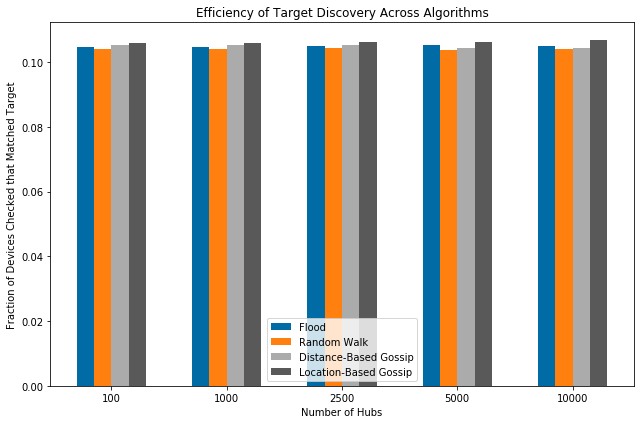

In [5]:
plt.figure(figsize=(9,6))
index = np.arange(len(network_sizes))
bar_width = 0.15

flood = [np.mean(sorted([x['Devices with Metric']/(x["Total Devices"]+1e-8) for x in data if x["type"] == "flood" and x["network_size"] == network_sizes[1]])),
        np.mean(sorted([x['Devices with Metric']/(x["Total Devices"]+1e-8) for x in data if x["type"] == "flood" and x["network_size"] == network_sizes[1]])),
        np.mean(sorted([x['Devices with Metric']/(x["Total Devices"]+1e-8) for x in data if x["type"] == "flood" and x["network_size"] == network_sizes[2]])),
        np.mean(sorted([x['Devices with Metric']/(x["Total Devices"]+1e-8) for x in data if x["type"] == "flood" and x["network_size"] == network_sizes[3]])),
        np.mean(sorted([x['Devices with Metric']/(x["Total Devices"]+1e-8) for x in data if x["type"] == "flood" and x["network_size"] == network_sizes[4]]))]

random_walk = [np.mean([x['Devices with Metric']/(x["Total Devices"]+1e-8) for x in data if x["type"] == "randomWalk" and x["network_size"] == network_sizes[1]]),
        np.mean([x['Devices with Metric']/(x["Total Devices"]+1e-8) for x in data if x["type"] == "randomWalk" and x["network_size"] == network_sizes[1]]),
        np.mean([x['Devices with Metric']/(x["Total Devices"]+1e-8) for x in data if x["type"] == "randomWalk" and x["network_size"] == network_sizes[2]]),
        np.mean([x['Devices with Metric']/(x["Total Devices"]+1e-8) for x in data if x["type"] == "randomWalk" and x["network_size"] == network_sizes[3]]),
        np.mean([x['Devices with Metric']/(x["Total Devices"]+1e-8) for x in data if x["type"] == "randomWalk" and x["network_size"] == network_sizes[4]])]

distance_gossip = [np.mean([x['Devices with Metric']/(x["Total Devices"]+1e-8) for x in data if x["type"] == "gossip_type_0" and x["network_size"] == network_sizes[1]]),
        np.mean([x['Devices with Metric']/(x["Total Devices"]+1e-8) for x in data if x["type"] == "gossip_type_0" and x["network_size"] == network_sizes[1]]),
        np.mean([x['Devices with Metric']/(x["Total Devices"]+1e-8) for x in data if x["type"] == "gossip_type_0" and x["network_size"] == network_sizes[2]]),
        np.mean([x['Devices with Metric']/(x["Total Devices"]+1e-8) for x in data if x["type"] == "gossip_type_0" and x["network_size"] == network_sizes[3]]),
        np.mean([x['Devices with Metric']/(x["Total Devices"]+1e-8) for x in data if x["type"] == "gossip_type_0" and x["network_size"] == network_sizes[4]])]

location_gossip = [np.mean([x['Devices with Metric']/(x["Total Devices"]+1e-8) for x in data if x["type"] == "gossip_type_1" and x["network_size"] == network_sizes[1]]),
        np.mean([x['Devices with Metric']/(x["Total Devices"]+1e-8) for x in data if x["type"] == "gossip_type_1" and x["network_size"] == network_sizes[1]]),
        np.mean([x['Devices with Metric']/(x["Total Devices"]+1e-8) for x in data if x["type"] == "gossip_type_1" and x["network_size"] == network_sizes[2]]),
        np.mean([x['Devices with Metric']/(x["Total Devices"]+1e-8) for x in data if x["type"] == "gossip_type_1" and x["network_size"] == network_sizes[3]]),
        np.mean([x['Devices with Metric']/(x["Total Devices"]+1e-8) for x in data if x["type"] == "gossip_type_1" and x["network_size"] == network_sizes[4]])]

plt.bar(index, flood, bar_width, label='Flood')
plt.bar(index + bar_width, random_walk, bar_width, label='Random Walk')
plt.bar(index + bar_width*2, distance_gossip, bar_width, label='Distance-Based Gossip')
plt.bar(index + bar_width*3, location_gossip, bar_width, label='Location-Based Gossip')

plt.xlabel('Number of Hubs')
plt.ylabel('Fraction of Devices Checked that Matched Target')
plt.title('Efficiency of Target Discovery Across Algorithms')
plt.xticks(index + 1.5*bar_width, network_sizes)
plt.legend()

plt.tight_layout()
plt.show()

## Number of Messages per Target Discovered

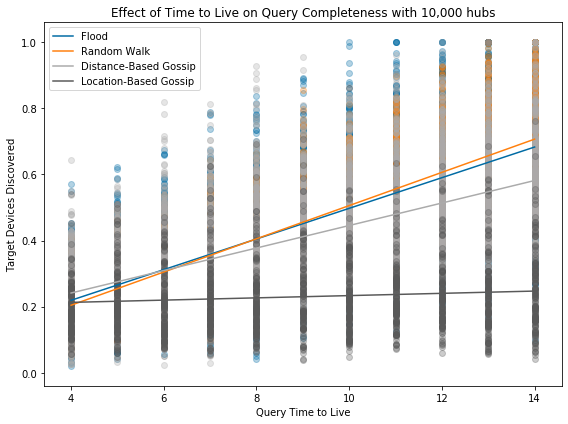

In [6]:
plt.figure(figsize=(8,6))

flood = sorted([(x['Normalized Devices with Metric'],x['Hop Limit']) for x in data if x["type"] == "flood" and x["Max Hops"] > 3], key=lambda x: x[1])
        
plt.scatter([x[1] for x in flood],[np.max(x[0]) for x in flood], alpha=0.3)
plt.plot(np.unique([x[1] for x in flood]), np.poly1d(np.polyfit([x[1] for x in flood], [np.max(x[0]) for x in flood], 1))(np.unique([x[1] for x in flood])))

random_walk = sorted([(x['Normalized Devices with Metric'],x['Hop Limit']) for x in data if x["type"] == "randomWalk" and x["Max Hops"] > 3], key=lambda x: x[1])

plt.scatter([x[1] for x in random_walk],[np.max(x[0]) for x in random_walk], alpha=0.3)
plt.plot(np.unique([x[1] for x in random_walk]), np.poly1d(np.polyfit([x[1] for x in random_walk], [np.max(x[0]) for x in random_walk], 1))(np.unique([x[1] for x in random_walk])))

distance_gossip = sorted([(x['Normalized Devices with Metric'],x['Hop Limit']) for x in data if x["type"] == "gossip_type_0" and x["Max Hops"] > 3], key=lambda x: x[1])
        
plt.scatter([x[1] for x in distance_gossip],[np.max(x[0]) for x in distance_gossip], alpha=0.3)
plt.plot(np.unique([x[1] for x in distance_gossip]), np.poly1d(np.polyfit([x[1] for x in distance_gossip], [np.max(x[0]) for x in distance_gossip], 1))(np.unique([x[1] for x in distance_gossip])))

location_gossip = sorted([(x['Normalized Devices with Metric'],x['Hop Limit']) for x in data if x["type"] == "gossip_type_1" and x["Max Hops"] > 3], key=lambda x: x[1])

plt.scatter([x[1] for x in location_gossip],[np.max(x[0]) for x in location_gossip], alpha=0.3)
plt.plot(np.unique([x[1] for x in location_gossip]), np.poly1d(np.polyfit([x[1] for x in location_gossip], [np.max(x[0]) for x in location_gossip], 1))(np.unique([x[1] for x in location_gossip])))
plt.xlabel('Query Time to Live')
plt.ylabel('Target Devices Discovered')
plt.title('Effect of Time to Live on Query Completeness with 10,000 hubs')
plt.legend(["Flood", "Random Walk", "Distance-Based Gossip", "Location-Based Gossip"])

plt.tight_layout()
plt.show()

## Effect of Gossip Cache Size on Query Completeness

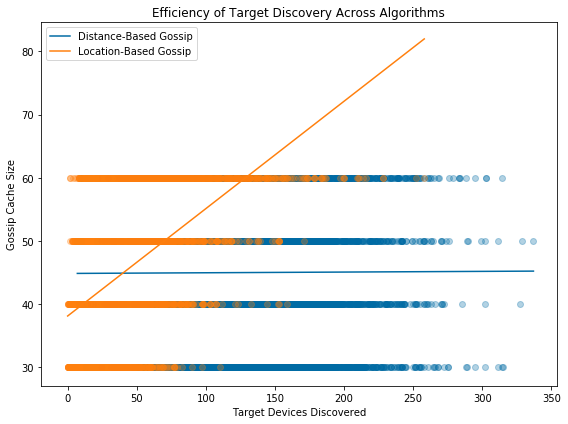

In [7]:
plt.figure(figsize=(8,6))

distance_gossip = sorted([(x['Devices with Metric'],x['cache_size']) for x in data if x["type"] == "gossip_type_0" and x['Devices with Metric'] < 400], key=lambda x: x[1])
        
plt.scatter([x[0] for x in distance_gossip],[np.max(x[1]) for x in distance_gossip], alpha=0.3)
plt.plot(np.unique([x[0] for x in distance_gossip]), np.poly1d(np.polyfit([x[0] for x in distance_gossip], [np.max(x[1]) for x in distance_gossip], 1))(np.unique([x[0] for x in distance_gossip])))

location_gossip = sorted([(x['Devices with Metric'],x['cache_size']) for x in data if x["type"] == "gossip_type_1" and x['Devices with Metric'] < 400], key=lambda x: x[1])

plt.scatter([x[0] for x in location_gossip],[np.max(x[1]) for x in location_gossip], alpha=0.3)
plt.plot(np.unique([x[0] for x in location_gossip]), np.poly1d(np.polyfit([x[0] for x in location_gossip], [np.max(x[1]) for x in location_gossip], 1))(np.unique([x[0] for x in location_gossip])))
plt.xlabel('Target Devices Discovered')
plt.ylabel('Gossip Cache Size')
plt.title('Efficiency of Target Discovery Across Algorithms')
plt.legend(["Distance-Based Gossip", "Location-Based Gossip"])

plt.tight_layout()
plt.show()